In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [37]:
import pandas as pd

data = {
    "Date": [
        "2023-01-01","2023-02-01","2023-03-01","2023-04-01","2023-05-01",
        "2023-06-01","2023-07-01","2023-08-01","2023-09-01","2023-10-01"
    ],
    "Sales": [200,220,250,270,300,320,350,370,390,420]
}

df = pd.DataFrame(data)
df




,Date,Sales
0,2023-01-01,200
1,2023-02-01,220
2,2023-03-01,250
3,2023-04-01,270
4,2023-05-01,300
5,2023-06-01,320
6,2023-07-01,350
7,2023-08-01,370
8,2023-09-01,390
9,2023-10-01,420


In [38]:
df.to_csv("sales.csv", index=False)


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    10 non-null     object
 1   Sales   10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [40]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10 non-null     datetime64[ns]
 1   Sales   10 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 292.0 bytes


In [41]:
df['Day'] = (df['Date'] - df['Date'].min()).dt.days
df


,Date,Sales,Day
0,2023-01-01,200,0
1,2023-02-01,220,31
2,2023-03-01,250,59
3,2023-04-01,270,90
4,2023-05-01,300,120
5,2023-06-01,320,151
6,2023-07-01,350,181
7,2023-08-01,370,212
8,2023-09-01,390,243
9,2023-10-01,420,273


In [42]:
X = df[['Day']]   # input
y = df['Sales']   # output


In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [44]:
# Prepare future days (next 30 days)
future_days = np.array([X['Day'].max() + i for i in range(1, 31)]).reshape(-1, 1)

# Predict sales
future_sales = model.predict(future_days)

# See first 5 predictions
future_sales[:5]


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([419.97546867, 420.77963873, 421.5838088 , 422.38797886,
       423.19214892])

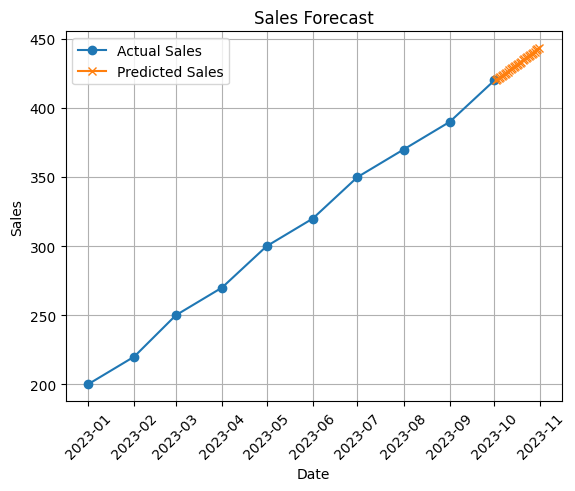

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# Dates for future prediction
future_dates = pd.date_range(df['Date'].max() + pd.Timedelta(days=1), periods=30)

# Plot old sales
plt.plot(df['Date'], df['Sales'], label='Actual Sales', marker='o')

# Plot predicted future sales
plt.plot(future_dates, future_sales, label='Predicted Sales', marker='x')

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Forecast")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [46]:
df.to_csv("sales.csv", index=False)
